# scikit-learn

### 欠損値への対応
- 欠損値への対処法
    - 欠損値を除去する
    - 欠損値を補完する

In [1]:
import numpy as np
import pandas as pd
# サンプルデータフレームをセット
df = pd.DataFrame(
    {
        'A':[1, np.nan, 3,4,5],
        'B':[6, 7, 8,np.nan, 10],
        'C':[11, 12, 13,14,15]
    }
)
display(df)
# 欠損値がどこにあるかを確認
display(df.isnull())
# 欠損値を除去
display(df.dropna())

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


,A,B,C
0,1.0,6.0,11
2,3.0,8.0,13
4,5.0,10.0,15


In [2]:
# 欠損値を補完
from sklearn.impute import SimpleImputer
# 平均値で補完
imp = SimpleImputer(strategy='mean') #ここをmedian, most_frequentなどで補完値を変更可能
imp.fit(df)
# 列の平均値で補完する
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

### カテゴリ変数のエンコーディング
- カテゴリ変数のエンコーディング
    - a->1, b->2, c->3のように変数を数値に変換する処理
- One-hot エンコーディング
    - 各行の該当する値の列のみに1, それ以外の列に0が入力されるように変換する

In [3]:
# カテゴリ変数のエンコーディング
df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':['a','b','c','b','c']
    }
)
df


,A,B
0,1,a
1,2,b
2,3,c
3,4,b
4,5,c


In [4]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
le = LabelEncoder()
# ラベルのエンコーディング
le.fit(df.loc[:, 'B'])
a = le.transform(df.loc[:, 'B'])
display(a)
# 元の値との対応を確認できる
le.classes_

array([0, 1, 2, 1, 2])

array(['a', 'b', 'c'], dtype=object)

In [5]:
df

,A,B
0,1,a
1,2,b
2,3,c
3,4,b
4,5,c


In [6]:
# One-hotエンコーディング
# sklearnを利用する場合は、OneHotEncoderクラスを利用する
# pandasを利用する場合は、get_dummies関数を利用
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df_one = df.copy()
# ラベルエンコーダーのインスタンス化
le = LabelEncoder()
df_one.loc[:,'B'] = le.fit_transform(df_one.loc[:,'B']) # type: ignore
# One-Hotエンコーダのインスタンス化
ohe = ColumnTransformer([('OneHotEncoder', OneHotEncoder(), [1])], remainder='passthrough')
# One-Hotエンコーディング
df_one = ohe.fit_transform(df_one)
df_one


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [0., 0., 1., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

### 特徴量の正規化
- 分散正規化
    - 特徴量の平均：0, 標準偏差：1となるように特徴量を正規化
- 最小最大正規化
    - 最小値：0, 最大値：1となるように特徴量を正規化


In [7]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,400,500,800]
    }
)
# 分散正規化のインスタンスを生成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)


array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
# 最小最大正規化のインスタンスを生成
mmsc = MinMaxScaler()
# 最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

### 分類
- 教師あり学習に分類されます
- 代表的なアルゴリズム
    - サポートベクタマシン
    - 決定木
    - ランダムフォレスト

### サンプルデータ
- 150枚のあやめの「がく」と「花びら」の長さと幅、花の種類を記録
- 説明変数X (numpy配列なので本当はヘッダーはないが、、)
    - がくの長さ
    - がくの幅
    - 花びらの長さ
    - 花びらの幅
- 目的変数y
    - Species:花の種類(0, 1, 2の3種類)
        - 0:Setosa
        - 1:Versicolor
        - 2:Viginica

In [9]:
# irisデータを用いてお試し実行してみる
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target # type: ignore
# 確認
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])


X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割
# test_size 0.3とすることで　train:test = 7:3に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


### サポートベクタマシン(SVM)
- 分類・回帰だけでなく、外れ値検出にも利用できるアルゴリズム
- 決定境界：各クラスのデータ間の距離が最も大きくなるようにひいた直線
- サポートベクタ：各クラスのデータ
- マージン：クラス間のサポートベクタの距離


[[0.68235186 0.05382102]
 [0.22035987 0.18437181]
 [0.1759059  0.81209451]
 [0.923345   0.2765744 ]
 [0.81975456 0.88989269]
 [0.51297046 0.2449646 ]
 [0.8242416  0.21376296]
 [0.74146705 0.6299402 ]
 [0.92740726 0.23190819]
 [0.79912513 0.51816504]
 [0.23155562 0.16590399]
 [0.49778897 0.58272464]
 [0.18433799 0.01489492]
 [0.47113323 0.72824333]
 [0.91860049 0.62553401]
 [0.91712257 0.86469025]
 [0.21814287 0.86612743]
 [0.73075194 0.27786529]
 [0.79704355 0.86522171]
 [0.2994379  0.52704208]
 [0.07148681 0.58323841]
 [0.2379064  0.76496365]
 [0.17363164 0.31274226]
 [0.01447448 0.03255192]
 [0.49670184 0.46831253]
 [0.12769032 0.2575625 ]
 [0.00318111 0.38106775]
 [0.57587308 0.42729877]
 [0.83510235 0.61649125]
 [0.26608391 0.81102211]
 [0.49948675 0.75881032]
 [0.56608909 0.43744036]
 [0.39615444 0.02223529]
 [0.46935079 0.6235584 ]
 [0.94611342 0.43532608]
 [0.4856414  0.51911514]
 [0.40859098 0.57879572]
 [0.07035067 0.48838383]
 [0.61014483 0.74387911]
 [0.42983032 0.30280213]


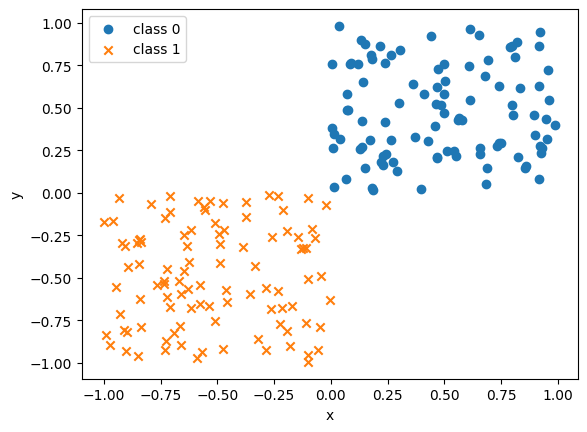

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 乱数シードを固定
rng = np.random.default_rng(123)
# x軸, y軸ともに0, 1までの一葉分布から100点をサンプリング
X0 = rng.uniform(size=(100,2))
# クラス0のラベルを100個生成
# repeat: 第一引数の要素を第二引数分生成
y0 = np.repeat(0, 100)
print(X0)
print(y0)
# x軸, y軸ともに -1, 0までの一葉分布から100点をサンプリング
X1 = rng.uniform(-1.0, 0.0, size=(100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図プロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


In [12]:
from sklearn.svm import SVC

# 学習及び決定境界、マージン、サポートベクタを可視化する関数を作成
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

    # 可視化
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class1')
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    # 投稿線を書くやつ
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    
    # サポートベクタをプロット
    ax.scatter(
        svc.support_vectors_[:, 0],
        svc.support_vectors_[:, 1],
        s=250,
        facecolors='none',
        edgecolors='black'
        )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()


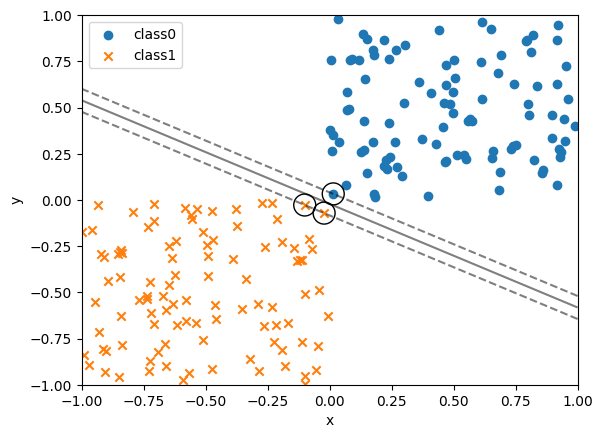

In [13]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

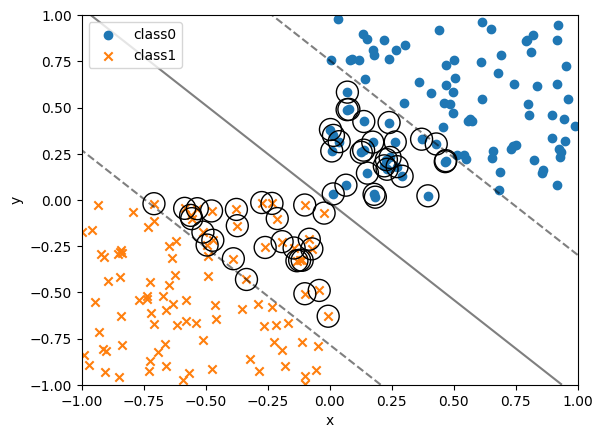

In [14]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=0.1)


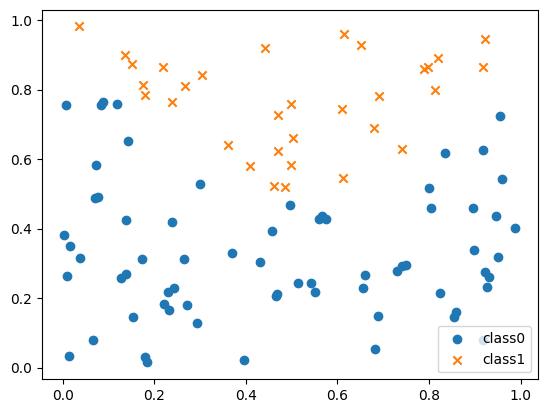

In [15]:
rng = np.random.default_rng(123)
X=rng.random(size=(100,2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1], marker="o", label="class0")
ax.scatter(X[y==1, 0], X[y==1, 1], marker="x", label="class1")
ax.legend()
plt.show()


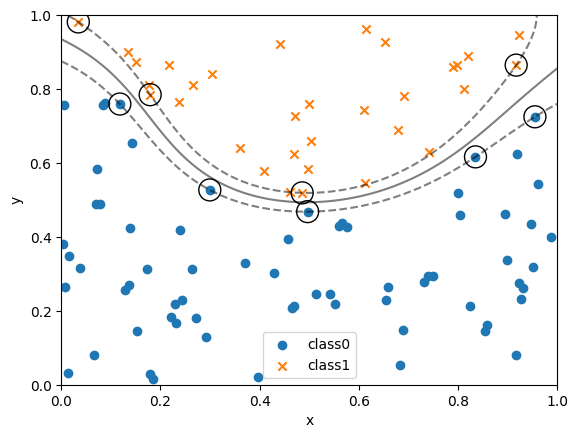

In [17]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y==0,:], X[y==1, :]
y0, y1 = y[y==0], y[y==1]
# kernel rbf=動径基底関数を使用
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='rbf', C=1e3, xmin=0,ymin=0)

### 決定木
- データを分類するルールを次々と作成していくことにより、分類を実行するアルゴリズム
- 用語
    - 木、ノード
        - 木の最上部：根ノード
        - 木の最下部の子ノードを持たないノード：葉ノード
    - エッジ：ノード間を結ぶ線

- 情報利得：データを分割することによってどれだけ得をするのか
    - 情報利得 = 親ノードの不純度 - 子ノードの不純度の合計
    - 情報利得 >0:親ノードの不純度の方が子ノードでの不純度の合計よりも大きくなる = 子ノードに分割した方が良い
    - 情報利得 <0:逆
- 不純度：どれだけクラスが混在しているか
    - ジニ不純度：各ノードに間違った割り振りをされてしまう確率
        - 条件付き確率的な感じですね
    - エントロピー：
    - 分類誤差：



In [18]:
# 決定木の実行
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X,y = iris.data, iris.target # type: ignore
# 学習データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)
# 決定技のインスタンス化
# max_depth:木の深さ
tree = DecisionTreeClassifier(max_depth=3, random_state=123)
# 学習
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=123)

In [22]:
# 学習した決定木の可視化
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
# dot形式のデータを抽出
dot_data = export_graphviz(
    tree, 
    filled=True,
    class_names=["Setosa", "Versicolor", "Virginica"],
    feature_names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"],
    out_file=None
    )
# プロットするためには、GraphVizをinstallする必要があります
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png") # type: ignore


True

In [23]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

### ランダムフォレスト
- データのサンプルと特徴量（説明変数）をランダムに選択して決定木を構築する処理を複数繰り返し、それぞれの木の推定結果の多数決や平均値により分類・回帰を行う手法
- 用語
    - ブーストラップデータ：ランダムに選択されたサンプルと特徴量
    - アンサンブル学習：複数の学習器を用いた学習方法
    

In [24]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化
forest = RandomForestClassifier(n_estimators=100, random_state=123)
# 学習
forest.fit(X_train, y_train)
# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 回帰
- 目的変数を別の単一または複数の値（説明変数、特徴量）で説明するタスク

- 線形回帰
    - 単回帰：説明変数が1変数
    - 重回帰：2変数以上の時

    

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# データセット読み込み
housing = fetch_california_housing()
X, y = housing.data, housing.target # type: ignore
# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 線形回帰をインスタンス化
lr = LinearRegression()
# 学習
lr.fit(X_train, y_train)


LinearRegression()

In [26]:
# テストデータセットを予測
y_pred = lr.predict(X_test)
y_pred

array([2.38551557, 1.43819761, 2.03910383, ..., 2.07597668, 2.58562082,
       2.429208  ])

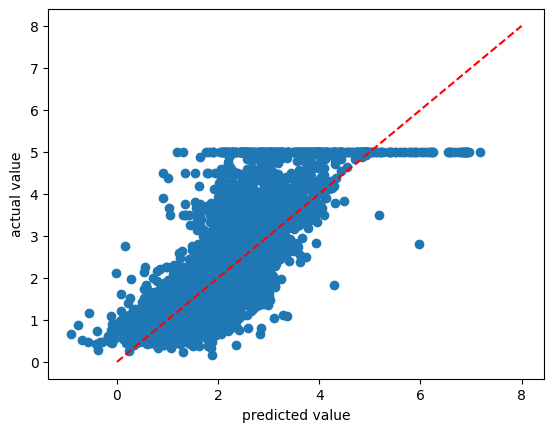

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,8), (0,8), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

## 次元削減
- データが持っている情報をなるべく損ねることなく次元を削減してデータを圧縮するタスク

### 主成分分析(PCA)
- 高次元のデータに対して分散が大きくなる方向を探して、元の次元と同じかそれよりも低い次元にデータを変換する手法


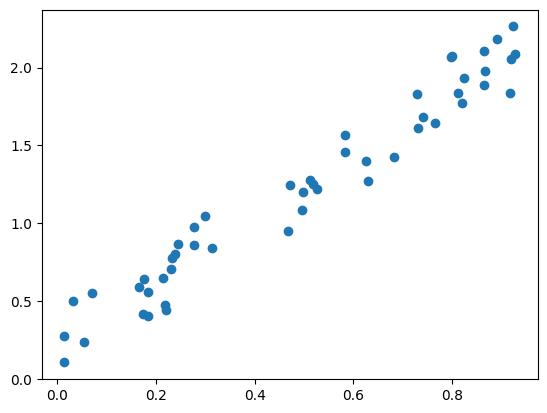

In [28]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)
# 0以上1未満の一様乱数を50個生成
X=rng.uniform(size=50)
Y=2*X + 0.5*rng.uniform(size=50)
fig,ax = plt.subplots()
ax.scatter(X,Y)
plt.show()


In [29]:
from sklearn.decomposition import PCA
# インスタンス化
# n_componentsで新たに何変数に変換するかを指定
pca = PCA(n_components=2)
# 主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X.reshape(-1, 1), Y.reshape(-1,1))))


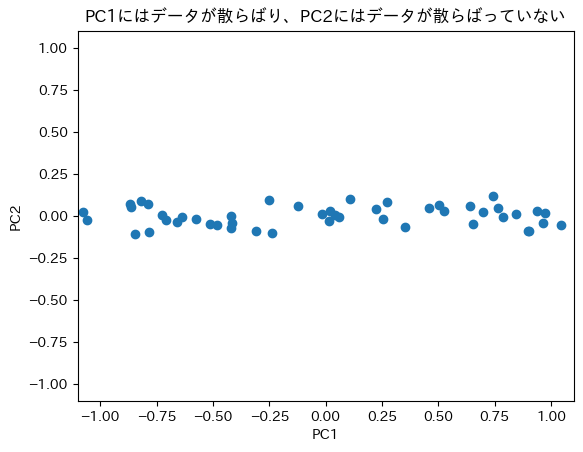

In [32]:
# 結果をプロットしてみる
import japanize_matplotlib
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title("PC1にはデータが散らばり、PC2にはデータが散らばっていない")
plt.show()